In [8]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
column_name=diabetics.feature_names
df_diabetics=pd.DataFrame(diabetics.data,columns=column_name)
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
diabetics=load_diabetes()

<Axes: ylabel='bmi'>

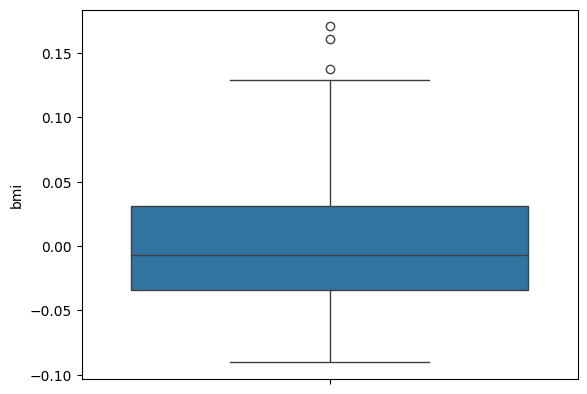

In [11]:
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

Text(0, 0.5, 'bp of the people(blood pressure)')

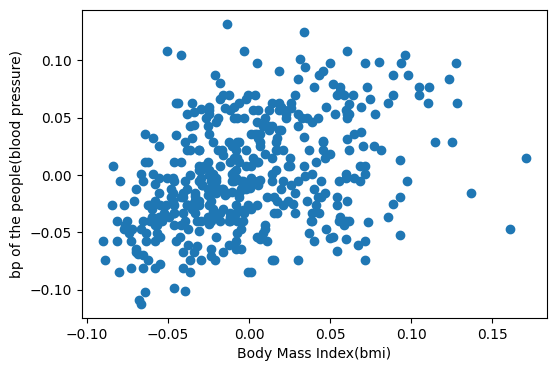

In [12]:
fig,ax=plt.subplots(figsize=(6,4))
ax.scatter(df_diabetics['bmi'],df_diabetics['bp'])
ax.set_xlabel('Body Mass Index(bmi)')
ax.set_ylabel('bp of the people(blood pressure)')

In [20]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df_diabetics))
print(z)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459841  0.929746  0.732065  0.912451   
1    0.039567  0.938537  1.082180  0.553505  0.177624  0.402886  1.564414   
2    1.793307  1.065488  0.934533  0.119214  0.958674  0.718897  0.680245   
3    1.872441  0.938537  0.243771  0.770650  0.256292  0.525397  0.757647   
4    0.113172  0.938537  0.764944  0.459841  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256040  0.119769  0.053957  0.602843   
438  0.115937  1.065488  0.334410  1.422086  1.037341  1.664355  0.602843   
439  0.876870  1.065488  0.334410  0.363573  0.785107  0.290965  0.525441   
440  0.956004  0.938537  0.821235  0.025550  0.343075  0.321306  0.602843   
441  0.956004  0.938537  1.535374  1.711613  1.760535  0.584649  3.654268   

           s4        s5        s6  
0    0.054499  0.418531  0.370989  
1  

In [21]:
import numpy as np
outlier_indices=np.where(z>2)[0]
no_outliers=df_diabetics.drop(outlier_indices)
print(no_outliers.shape)

(313, 10)


In [22]:
outlier_indices=np.where(z>2)[0]
no_outliers=df_diabetics.drop(outlier_indices)
print(df_diabetics.shape)
print("================================================")
print(no_outliers.shape)

(442, 10)
(313, 10)


In [23]:
Q1=np.percentile(df_diabetics['bmi'],25,method='midpoint')
Q3=np.percentile(df_diabetics['bmi'],75,method='midpoint')
IQR=Q3-Q1
print(IQR)

0.06520763046978838


In [24]:
upper=Q3+1.5*IQR
upper_array=np.array(df_diabetics['bmi']>=upper)
print("Upper bound is:",upper)
print("-----------------------------------")
print(upper_array.sum())

Upper bound is: 0.12879000811776306
-----------------------------------
3


In [25]:
lower=Q1-1.5*IQR
lower_array=np.array(df_diabetics['bmi']<=lower)
print("Lower Bound is:",lower)
print("-----------------------------------")
print(lower_array.sum())

Lower Bound is: -0.13204051376139045
-----------------------------------
0


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("scores.csv")
data.shape
data.sample(5)
data.describe()

,Emotional_Quotient,Intelligence_Quotient,Marks
count,80.000000,80.000000,80.000000
mean,73.125000,145.262500,76.062500
std,6.672018,21.560479,9.195959
min,50.000000,120.000000,45.000000
25%,68.000000,130.000000,72.000000
50%,73.000000,135.000000,76.000000
75%,78.000000,160.250000,81.250000
max,92.000000,215.000000,100.000000


<ipython-input-32-e92ed6918822>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Emotional_Quotient'])
<ipython-input-32-e92ed6918822>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Intelligence_Quotient'])
<ipython-input-32-e92ed6918822>:9: UserWarning: 

`distplot` is a deprecate

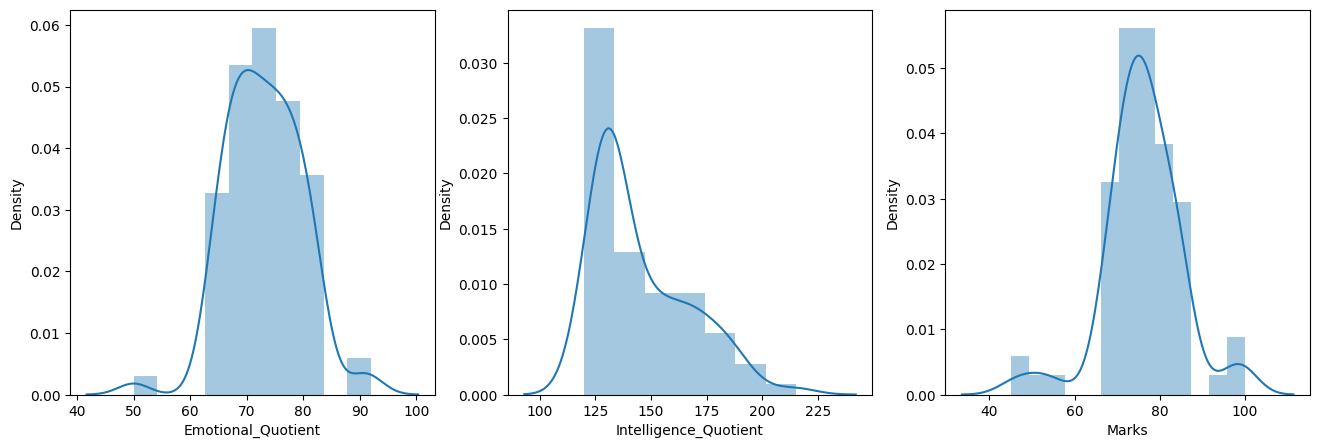

In [32]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['Emotional_Quotient'])

plt.subplot(1,3,2)
sns.distplot(data['Intelligence_Quotient'])

plt.subplot(1,3,3)
sns.distplot(data['Marks'])

plt.show()